In [1]:
import sys
sys.path.append("../library")

In [2]:
from __future__ import print_function
from thinkbayes2 import Suite
import thinkplot

In [3]:
# perfectly balanced coin, refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/euro.py
class Euro(Suite):
    def Likelihood(self, data, hypo):
        x = hypo
        if data == 'H':
            return x / 100.0
        else:
            return 1 - x / 100.0

In [4]:
def Summarize(suite):
    """
    Prints summary statistics for the suite.
    """
    # check if 50% probablity of balanced coin
    print(suite.Prob(50))
    # 1. Maximum Likelihood
    print('Maximum Likelihood: ', suite.MaximumLikelihood())
    # 2. Mean and Median
    print('Mean: ', suite.Mean())
    print('Median: ', suite.Percentile(50)) 
    print('5th: ', suite.Percentile(5)) 
    print('95th: ', suite.Percentile(95)) 
    # 3. Credible inverval
    print('Credible inveral', suite.CredibleInterval(90))

In [5]:
Hx = 101
suite = Euro(range(Hx))
dataset = 'H' * 140 + 'T' * 110
suite.UpdateSet(dataset)
Summarize(suite)
# if not include 50, then coin isn't perfectly balanced

0.020976526129544672
Maximum Likelihood:  56
Mean:  55.95238095238098
Median:  56
5th:  51
95th:  61
Credible inveral (51, 61)


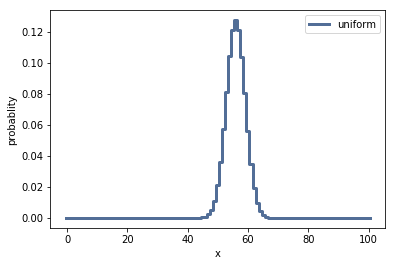

In [6]:
thinkplot.PrePlot(1)
thinkplot.Pmf(suite, label='uniform')
thinkplot.Show(xlabel='x', ylabel='probablity')

In [7]:
# replace prior with triangle prior
# perfectly balanced coin, refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/euro.py
class Euro1(Suite):
    def __init__(self, hypos):
        super().__init__(self)
        for x in range(0, 51):
            self.Set(x, x)
        for x in range(51, 101):
            self.Set(x, 100 - x)
        self.Normalize()
        
    def Likelihood(self, data, hypo):
        x = hypo
        if data == 'H':
            return x / 100.0
        else:
            return 1 - x / 100.0

In [8]:
Hx = 101
suite = Euro1(range(Hx))
dataset = 'H' * 140 + 'T' * 110
suite.UpdateSet(dataset)
Summarize(suite)

0.02384753721469363
Maximum Likelihood:  56
Mean:  55.74349943859506
Median:  56
5th:  51
95th:  61
Credible inveral (51, 61)


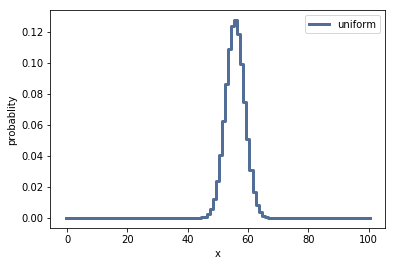

In [9]:
thinkplot.PrePlot(1)
thinkplot.Pmf(suite, label='uniform')
thinkplot.Show(xlabel='x', ylabel='probablity')

In [13]:
# replace prior with triangle prior
# perfectly balanced coin, refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/euro.py
# optimize with group power() function, instead of looping for each case of head, tail
class Euro2(Suite):
    def __init__(self, hypos):
        super().__init__(self)
        for x in range(0, 51):
            self.Set(x, x)
        for x in range(51, 101):
            self.Set(x, 100 - x)
        self.Normalize()
        
    def Likelihood(self, data, hypo):
        """
        replace data with (heads, tails)
        """
        x = hypo / 100.0
        heads, tails = data
        like = x ** heads * (1-x) ** tails
        return like

In [14]:
Hx = 101
suite = Euro2(range(Hx))
heads, tails = 140, 100
suite.Update((heads, tails))
Summarize(suite)

0.005292169225214459
Maximum Likelihood:  58
Mean:  58.02692703565193
Median:  58
5th:  53
95th:  63
Credible inveral (53, 63)


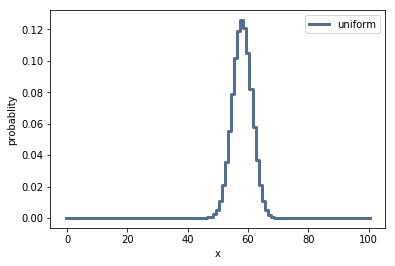

In [15]:
thinkplot.PrePlot(1)
thinkplot.Pmf(suite, label='uniform')
thinkplot.Show(xlabel='x', ylabel='probablity')

In [16]:
# using beta distribution
from thinkbayes2 import Beta

In [23]:
beta = Beta()
beta.Update((140, 100))
print("Mean for beta distribution: {}".format(beta.Mean()))
pmfBeta = beta.MakePmf()
print("Probablity for 50% of beta distribution: {}".format(pmfBeta.Prob(50)))
cdfBeta = beta.MakeCdf()
print("Median for beta distribution: {}".format(cdfBeta.Percentile(50)))
print("Credible interval for beta distribution: {}".format(cdfBeta.ConfidenceInterval(90)))

Mean for beta distribution: 0.5826446280991735
Probablity for 50% of beta distribution: 0
Median for beta distribution: 0.59
Credible interval for beta distribution: (0.54000000000000004, 0.64000000000000001)
